# Face detection

## preparation


### import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, shutil
import cv2
import json
import math

### upload and import photos

In [5]:
dir = "masks"
image_path = [file.path for file in os.scandir(dir) if file.name.split(".")[-1] == 'png']
print(image_path)

['masks/11.png', 'masks/14.png', 'masks/5.png', 'masks/17.png', 'masks/13.png', 'masks/0.png', 'masks/10.png', 'masks/15.png', 'masks/16.png', 'masks/2.png', 'masks/12.png']


In [7]:
qty_mask_img = len(image_path)
qty_mask_img

11

### check photo

In [14]:
np.random.seed(2)
mask_num = np.random.randint(qty_mask_img)
mask_num

8

In [15]:
image_path[mask_num]

'masks/16.png'

[[[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 ...

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]]
(500, 500, 4)


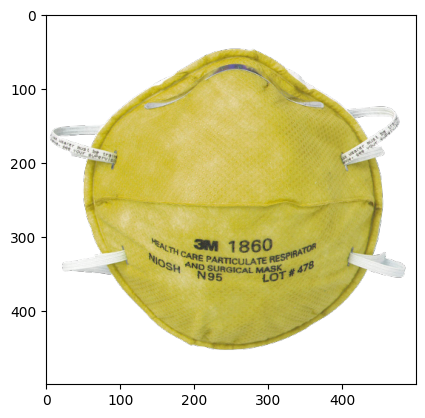

In [20]:
img_mask_original = cv2.imread(image_path[mask_num], cv2.IMREAD_UNCHANGED)
print(img_mask_original)
print(img_mask_original.shape)
implot = plt.imshow(img_mask_original)

In [21]:
img_mask_bgr = img_mask_original[:, :, 0:3]
print(img_mask_bgr)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [23]:
img_mask_alpha = img_mask_original[:, :, 3]
print(img_mask_alpha)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [24]:
_, item_mask = cv2.threshold(img_mask_alpha, 220, 255, cv2.THRESH_BINARY)
item_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

Text(0.5, 1.0, 'alpha')

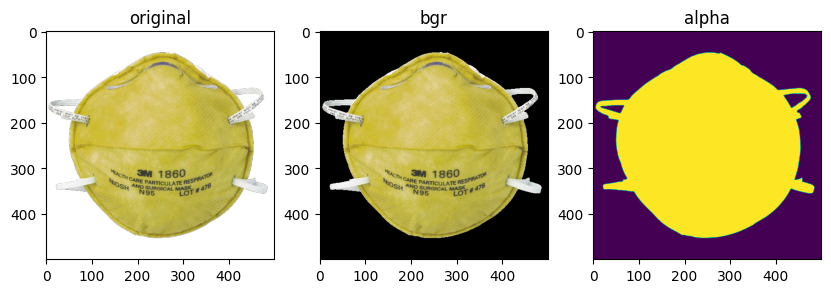

In [26]:
plt.figure(figsize=[10,10])

plt.subplot(1,3,1)
plt.imshow(img_mask_original)
plt.title('original')

plt.subplot(1,3,2)
plt.imshow(img_mask_bgr)
plt.title('bgr')

plt.subplot(1,3,3)
plt.imshow(img_mask_alpha)
plt.title('alpha')

# dlib

In [29]:
%pip install dlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
import dlib

In [31]:
predictor_path = 'shape_predictor_68_face_landmarks.dat'
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(predictor_path)

faces: rectangles[[(295, 542) (849, 1096)]]
scores: [1.7402098812593336]
idx: [0]


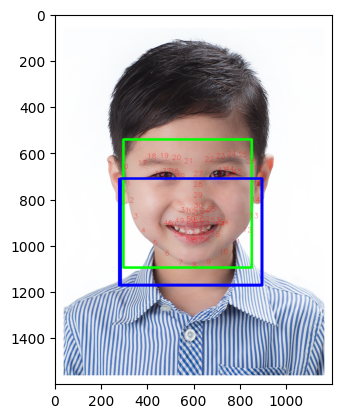

In [74]:
idx0 = 'idx0.jpg'
img_idx0 = cv2.imread(idx0)
# print(img_idx0)
if img_idx0 is None:
  print('dead photo {}'.format(idx0))
else:
  faces, scores, idx = detector.run(img_idx0, 1)
  print('faces:', faces)
  print('scores:', scores)
  print('idx:', idx)
  for i, d in enumerate(faces):
    cv2.rectangle(img_idx0, (d.left(), d.top()), (d.right(), d.bottom()), (0,255,0), 10)
    shape = predictor(img_idx0, d)
    for i in range(68):
      # cv2.circle(img_idx0, (shape.part(i).x, shape.part(i).y), 2, (0,0,255), 10, 10)
      cv2.putText(img_idx0, str(i), (shape.part(i).x, shape.part(i).y), cv2.FONT_HERSHEY_SIMPLEX,
               1, (0,0,255))
      
      (x_min, y_min), (x_max, y_max) = mouth_detection(img_idx0, predictor, d)
      cv2.rectangle(img_idx0, (x_min, y_min), (x_max, y_max), (255,0,0), 3)
  plt.imshow(img_idx0[:,:,::-1])

faces: rectangles[[(498, 468) (765, 736)]]
scores: [0.36797175752133393]
idx: [2]


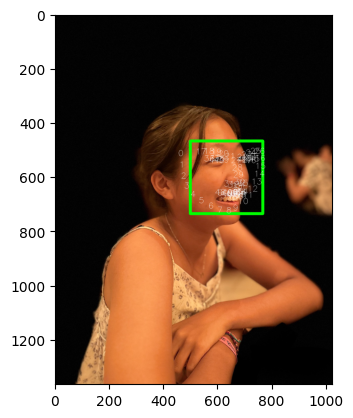

In [73]:
idx1 = 'idx1.jpg'
img_idx1 = cv2.imread(idx1)
# print(img_idx0)
if img_idx1 is None:
  print('dead photo {}'.format(idx1))
else:
  faces, scores, idx = detector.run(img_idx1, 1)
  print('faces:', faces)
  print('scores:', scores)
  print('idx:', idx)
  for i, d in enumerate(faces):
    cv2.rectangle(img_idx1, (d.left(), d.top()), (d.right(), d.bottom()), (0,255,0), 10)
    shape = predictor(img_idx0, d)
    for i in range(68):
      # cv2.circle(img_idx1, (shape.part(i).x, shape.part(i).y), 2, (0,0,255), 10, 10)
      cv2.putText(img_idx1, str(i), (shape.part(i).x, shape.part(i).y), cv2.FONT_HERSHEY_SIMPLEX,
               1, (255,255,255))
  plt.imshow(img_idx1[:,:,::-1])

faces: rectangles[[(206, 502) (872, 1168)]]
scores: [0.4803695832558099]
idx: [1]


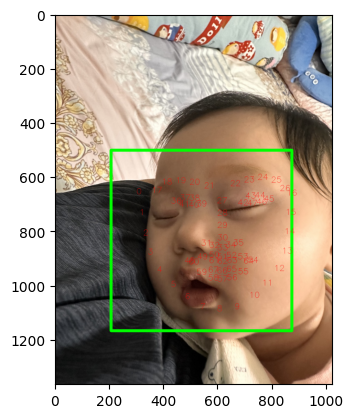

In [66]:
idx2 = 'idx2.jpg'
img_idx2 = cv2.imread(idx2)
# print(img_idx2)
if img_idx2 is None:
  print('dead photo {}'.format(idx2))
else:
  faces, scores, idx = detector.run(img_idx2, 1)
  print('faces:', faces)
  print('scores:', scores)
  print('idx:', idx)
  for i, d in enumerate(faces):
    cv2.rectangle(img_idx2, (d.left(), d.top()), (d.right(), d.bottom()), (0,255,0), 10)
    shape = predictor(img_idx0, d)
    for i in range(68):
      # cv2.circle(img_idx2, (shape.part(i).x, shape.part(i).y), 2, (0,0,255), 10, 10)
      cv2.putText(img_idx2, str(i), (shape.part(i).x, shape.part(i).y), cv2.FONT_HERSHEY_SIMPLEX,
               1, (0,0,255))
  plt.imshow(img_idx2[:,:,::-1])

faces: rectangles[[(121, 166) (157, 202)]]
scores: [0.10082548759798637]
idx: [3]


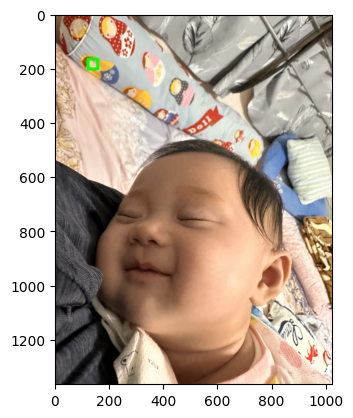

In [55]:
idx3 = 'idx3.jpg'
img_idx3 = cv2.imread(idx3)
# print(img_idx3)
if img_idx3 is None:
  print('dead photo {}'.format(idx3))
else:
  faces, scores, idx = detector.run(img_idx3, 1)
  print('faces:', faces)
  print('scores:', scores)
  print('idx:', idx)
  for i, d in enumerate(faces):
    cv2.rectangle(img_idx3, (d.left(), d.top()), (d.right(), d.bottom()), (0,255,0), 10)
  plt.imshow(img_idx3[:,:,::-1])

faces: rectangles[]
scores: []
idx: []


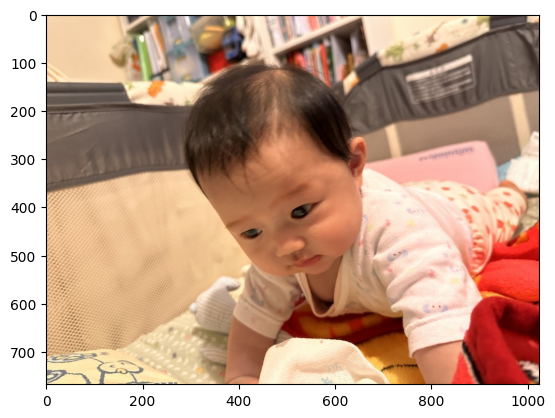

In [67]:
error = 'error.jpg'
img_error = cv2.imread(error)
# print(img_error)
if img_error is None:
  print('dead photo {}'.format(error))
else:
  faces, scores, idx = detector.run(img_error, 1)
  print('faces:', faces)
  print('scores:', scores)
  print('idx:', idx)
  for i, d in enumerate(faces):
    cv2.rectangle(img_error, (d.left(), d.top()), (d.right(), d.bottom()), (0,255,0), 10)
    shape = predictor(img_error, d)
    for i in range(68):
      # cv2.circle(img_error, (shape.part(i).x, shape.part(i).y), 2, (0,0,255), 10, 10)
      cv2.putText(img_error, str(i), (shape.part(i).x, shape.part(i).y), cv2.FONT_HERSHEY_SIMPLEX,
               1, (0,0,255))
  plt.imshow(img_error[:,:,::-1])

In [72]:
def mouth_detection(img, predictor, d):
  face_height = d.bottom() - d.top()
  face_width = d.right() - d.left()

  shape = predictor(img, d)

  x = list()
  y = list()

  for i in range(48, 68):
    x.append(shape.part(i).x)
    y.append(shape.part(i).y)
  
  height_margin = face_height //3
  width_margin = face_width //3

  y_max = min((max(y) + height_margin), img.shape[0])
  y_min = max((min(y) - height_margin), 0)
  x_max = min((max(x) + width_margin), img.shape[1])
  x_min = max((min(x) - width_margin), 0)
  
  return (x_min, y_min), (x_max, y_max)